# Compare outcomes from differential analysis based on different imputation methods

- load scores based on `10_1_ald_diff_analysis`

In [1]:
import logging
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display

import vaep
import vaep.databases.diseases

logger = vaep.logging.setup_nb_logger()

plt.rcParams['figure.figsize'] = (2, 2)
fontsize = 5
vaep.plotting.make_large_descriptors(fontsize)
logging.getLogger('fontTools').setLevel(logging.ERROR)

# catch passed parameters
args = None
args = dict(globals()).keys()

## Parameters
Default and set parameters for the notebook.

In [2]:
folder_experiment = 'runs/appl_ald_data/plasma/proteinGroups'

target = 'kleiner'
model_key = 'VAE'
baseline = 'RSN'
out_folder = 'diff_analysis'
selected_statistics = ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected']

disease_ontology = 5082  # code from https://disease-ontology.org/
# split diseases notebook? Query gene names for proteins in file from uniprot?
annotaitons_gene_col = 'PG.Genes'

In [3]:
# Parameters
disease_ontology = 10652
folder_experiment = "runs/alzheimer_study"
target = "AD"
baseline = "PI"
model_key = "QRILC"
out_folder = "diff_analysis"
annotaitons_gene_col = "None"


Add set parameters to configuration

In [4]:
params = vaep.nb.get_params(args, globals=globals())
args = vaep.nb.Config()
args.folder_experiment = Path(params["folder_experiment"])
args = vaep.nb.add_default_paths(args,
                                 out_root=(
                                     args.folder_experiment
                                     / params["out_folder"]
                                     / params["target"]
                                     / f"{params['baseline']}_vs_{params['model_key']}"))
args.update_from_dict(params)
args.scores_folder = scores_folder = (args.folder_experiment
                                      / params["out_folder"]
                                      / params["target"]
                                      / 'scores')
args.freq_features_observed = args.folder_experiment / 'freq_features_observed.csv'
args

root - INFO     Removed from global namespace: folder_experiment


root - INFO     Removed from global namespace: target


root - INFO     Removed from global namespace: model_key


root - INFO     Removed from global namespace: baseline


root - INFO     Removed from global namespace: out_folder


root - INFO     Removed from global namespace: selected_statistics


root - INFO     Removed from global namespace: disease_ontology


root - INFO     Removed from global namespace: annotaitons_gene_col


root - INFO     Already set attribute: folder_experiment has value runs/alzheimer_study


root - INFO     Already set attribute: out_folder has value diff_analysis


{'annotaitons_gene_col': 'None',
 'baseline': 'PI',
 'data': PosixPath('runs/alzheimer_study/data'),
 'disease_ontology': 10652,
 'folder_experiment': PosixPath('runs/alzheimer_study'),
 'freq_features_observed': PosixPath('runs/alzheimer_study/freq_features_observed.csv'),
 'model_key': 'QRILC',
 'out_figures': PosixPath('runs/alzheimer_study/figures'),
 'out_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC'),
 'out_metrics': PosixPath('runs/alzheimer_study'),
 'out_models': PosixPath('runs/alzheimer_study'),
 'out_preds': PosixPath('runs/alzheimer_study/preds'),
 'scores_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/scores'),
 'selected_statistics': ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected'],
 'target': 'AD'}

### Excel file for exports

In [5]:
files_out = dict()
writer_args = dict(float_format='%.3f')

fname = args.out_folder / 'diff_analysis_compare_methods.xlsx'
files_out[fname.name] = fname
writer = pd.ExcelWriter(fname)
logger.info("Writing to excel file: %s", fname)

root - INFO     Writing to excel file: runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC/diff_analysis_compare_methods.xlsx


## Load scores

### Load baseline model scores
Show all statistics, later use selected statistics

In [6]:
fname = args.scores_folder / f'diff_analysis_scores_{args.baseline}.pkl'
scores_baseline = pd.read_pickle(fname)
scores_baseline

model                                      PI                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.591  1  0.868 0.353 0.005   
                             age        0.340  1  0.499 0.481 0.003   
                             Kiel       3.026  1  4.447 0.036 0.023   
                             Magdeburg  5.213  1  7.661 0.006 0.039   
                             Sweden     8.225  1 12.088 0.001 0.060   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         0.033  1  0.036 0.850 0.000   
                             age        1.206  1  1.304 0.255 0.007   
                             Kiel       0.011  1  0.012 0.914 0.000   
                             Magdeburg  2.104  1  2.275 0.133 0.012   
                             Sweden    10.551  1 11.410 0.001 0.056   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                0.453  0.514    False  
                             age               0.318  0.633    False  
                             Kiel              1.441  0.095    False  
                             Magdeburg         2.208  0.023     True  
                             Sweden            3.202  0.003     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.071  0.914    False  
                             age               0.594  0.412    False  
                             Kiel              0.039  0.953    False  
                             Magdeburg         0.876  0.259    False  
                             Sweden            3.053  0.005     True  

[7105 rows x 8 columns]

### Load selected comparison model scores

In [7]:
fname = args.scores_folder / f'diff_analysis_scores_{args.model_key}.pkl'
scores_model = pd.read_pickle(fname)
scores_model

model                                   QRILC                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.635  1  3.999 0.047 0.021   
                             age        0.003  1  0.022 0.883 0.000   
                             Kiel       0.369  1  2.324 0.129 0.012   
                             Magdeburg  0.982  1  6.187 0.014 0.031   
                             Sweden     2.506  1 15.786 0.000 0.076   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         2.814  1  1.471 0.227 0.008   
                             age        0.849  1  0.444 0.506 0.002   
                             Kiel       7.258  1  3.793 0.053 0.019   
                             Magdeburg 18.870  1  9.861 0.002 0.049   
                             Sweden     0.279  1  0.146 0.703 0.001   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                1.328  0.108    False  
                             age               0.054  0.927    False  
                             Kiel              0.889  0.239    False  
                             Magdeburg         1.862  0.040     True  
                             Sweden            3.998  0.001     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.644  0.366    False  
                             age               0.296  0.638    False  
                             Kiel              1.276  0.118    False  
                             Magdeburg         2.708  0.008     True  
                             Sweden            0.153  0.801    False  

[7105 rows x 8 columns]

### Combined scores
show only selected statistics for comparsion

In [8]:
scores = scores_model.join(scores_baseline, how='outer')[[args.baseline, args.model_key]]
scores = scores.loc[:, pd.IndexSlice[scores.columns.levels[0].to_list(),
                                     args.selected_statistics]]
scores

model                                     PI                                \
var                                    p-unc -Log10 pvalue qvalue rejected   
protein groups               Source                                          
A0A024QZX5;A0A087X1N8;P35237 AD        0.353         0.453  0.514    False   
                             age       0.481         0.318  0.633    False   
                             Kiel      0.036         1.441  0.095    False   
                             Magdeburg 0.006         2.208  0.023     True   
                             Sweden    0.001         3.202  0.003     True   
...                                      ...           ...    ...      ...   
S4R3U6                       AD        0.850         0.071  0.914    False   
                             age       0.255         0.594  0.412    False   
                             Kiel      0.914         0.039  0.953    False   
                             Magdeburg 0.133         0.876  0.259    False   
                             Sweden    0.001         3.053  0.005     True   

model                                  QRILC                                
var                                    p-unc -Log10 pvalue qvalue rejected  
protein groups               Source                                         
A0A024QZX5;A0A087X1N8;P35237 AD        0.047         1.328  0.108    False  
                             age       0.883         0.054  0.927    False  
                             Kiel      0.129         0.889  0.239    False  
                             Magdeburg 0.014         1.862  0.040     True  
                             Sweden    0.000         3.998  0.001     True  
...                                      ...           ...    ...      ...  
S4R3U6                       AD        0.227         0.644  0.366    False  
                             age       0.506         0.296  0.638    False  
                             Kiel      0.053         1.276  0.118    False  
                             Magdeburg 0.002         2.708  0.008     True  
                             Sweden    0.703         0.153  0.801    False  

[7105 rows x 8 columns]

Models in comparison (name mapping)

In [9]:
models = vaep.nb.Config.from_dict(
    vaep.pandas.index_to_dict(scores.columns.get_level_values(0)))
vars(models)

{'PI': 'PI', 'QRILC': 'QRILC'}

## Describe scores

In [10]:
scores.describe()

model        PI                             QRILC                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 7,105.000     7,105.000 7,105.000 7,105.000     7,105.000 7,105.000
mean      0.261         2.486     0.337     0.244         2.742     0.310
std       0.303         5.360     0.331     0.297         5.154     0.324
min       0.000         0.000     0.000     0.000         0.000     0.000
25%       0.004         0.334     0.014     0.002         0.366     0.008
50%       0.120         0.919     0.241     0.090         1.046     0.180
75%       0.463         2.449     0.617     0.430         2.693     0.574
max       1.000       145.358     1.000     0.999        84.549     0.999

### One to one comparison of by feature:

In [11]:
scores = scores.loc[pd.IndexSlice[:, args.target], :]
scores.to_excel(writer, 'scores', **writer_args)
scores

model                                                        PI                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.353         0.453   
A0A024R0T9;K7ER74;P02655                           AD     0.049         1.312   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.043         1.370   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.496         0.304   
A0A075B6H7                                         AD     0.114         0.945   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.013         1.871   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.082         1.084   
S4R3U6                                             AD     0.850         0.071   

model                                                                      \
var                                                       qvalue rejected   
protein groups                                     Source                   
A0A024QZX5;A0A087X1N8;P35237                       AD      0.514    False   
A0A024R0T9;K7ER74;P02655                           AD      0.119    False   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.107    False   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.646    False   
A0A075B6H7                                         AD      0.230    False   
...                                                          ...      ...   
Q9Y6R7                                             AD      0.315    False   
Q9Y6X5                                             AD      0.043     True   
Q9Y6Y8;Q9Y6Y8-2                                    AD      0.181    False   
Q9Y6Y9                                             AD      0.179    False   
S4R3U6                                             AD      0.914    False   

model                                                     QRILC                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.047         1.328   
A0A024R0T9;K7ER74;P02655                           AD     0.034         1.467   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.364         0.439   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.309         0.510   
A0A075B6H7                                         AD     0.082         1.087   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.040         1.401   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.868         0.061   
S4R3U6                                             AD     0.227         0.644   

model                                                                      
var                                                       qvalue rejected  
protein groups                                     Source                  
A0A024QZX5;A0A087X1N8;P35237                       AD      0.108    False  
A0A024R0T9;K7ER74;P02655                           AD      0.084    False  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.512    False  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.457    False  
A0A075B6H7                                         AD      0.168    False  
...                                        

And the descriptive statistics
of the numeric values:

In [12]:
scores.describe()

model        PI                             QRILC                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 1,421.000     1,421.000 1,421.000 1,421.000     1,421.000 1,421.000
mean      0.251         1.408     0.334     0.246         1.490     0.319
std       0.288         1.634     0.315     0.288         1.793     0.312
min       0.000         0.003     0.000     0.000         0.001     0.000
25%       0.011         0.364     0.038     0.009         0.365     0.030
50%       0.124         0.905     0.246     0.105         0.979     0.203
75%       0.432         1.943     0.591     0.431         2.022     0.575
max       0.994        22.344     0.996     0.998        25.936     0.998

and the boolean decision values

In [13]:
scores.describe(include=['bool', 'O'])

model,PI,QRILC
var,rejected,rejected
count,1421,1421
unique,2,2
top,False,False
freq,1030,1003


## Load frequencies of observed features

In [14]:
freq_feat = pd.read_csv(args.freq_features_observed, index_col=0)
freq_feat.columns = pd.MultiIndex.from_tuples([('data', 'frequency'),])
freq_feat

,data
,frequency
protein groups,
A0A024QZX5;A0A087X1N8;P35237,186
A0A024R0T9;K7ER74;P02655,195
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,174
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,196
A0A075B6H7,91
...,...
Q9Y6R7,197
Q9Y6X5,173


## Compare shared features

In [15]:
scores_common = (scores
                 .dropna()
                 .reset_index(-1, drop=True)
                 ).join(
    freq_feat, how='left'
)
scores_common

PI                       \
                                                   p-unc -Log10 pvalue qvalue   
protein groups                                                                  
A0A024QZX5;A0A087X1N8;P35237                       0.353         0.453  0.514   
A0A024R0T9;K7ER74;P02655                           0.049         1.312  0.119   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... 0.043         1.370  0.107   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            0.496         0.304  0.646   
A0A075B6H7                                         0.114         0.945  0.230   
...                                                  ...           ...    ...   
Q9Y6R7                                             0.175         0.756  0.315   
Q9Y6X5                                             0.013         1.871  0.043   
Q9Y6Y8;Q9Y6Y8-2                                    0.083         1.079  0.181   
Q9Y6Y9                                             0.082         1.084  0.179   
S4R3U6                                             0.850         0.071  0.914   

                                                            QRILC  \
                                                   rejected p-unc   
protein groups                                                      
A0A024QZX5;A0A087X1N8;P35237                          False 0.047   
A0A024R0T9;K7ER74;P02655                              False 0.034   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False 0.364   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False 0.309   
A0A075B6H7                                            False 0.082   
...                                                     ...   ...   
Q9Y6R7                                                False 0.175   
Q9Y6X5                                                 True 0.040   
Q9Y6Y8;Q9Y6Y8-2                                       False 0.083   
Q9Y6Y9                                                False 0.868   
S4R3U6                                                False 0.227   

                                                                         \
                                                   -Log10 pvalue qvalue   
protein groups                                                            
A0A024QZX5;A0A087X1N8;P35237                               1.328  0.108   
A0A024R0T9;K7ER74;P02655                                   1.467  0.084   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...         0.439  0.512   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503                    0.510  0.457   
A0A075B6H7                                                 1.087  0.168   
...                                                          ...    ...   
Q9Y6R7                                                     0.756  0.302   
Q9Y6X5                                                     1.401  0.094   
Q9Y6Y8;Q9Y6Y8-2                                            1.079  0.170   
Q9Y6Y9                                                     0.061  0.919   
S4R3U6                                                     0.644  0.366   

                                                                 data  
                                                   rejected frequency  
protein groups                                                         
A0A024QZX5;A0A087X1N8;P35237                          False       186  
A0A024R0T9;K7ER74;P02655                              False       195  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False       174  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False       196  
A0A075B6H7                                            False        91  
...                                                     ...       ...  
Q9Y6R7                                                False       197  
Q9Y6X5                                                False       173  
Q9Y6Y8;Q9Y6Y8-2                                       False       197  
Q9Y6Y9                               

### Annotate decisions in Confusion Table style:

In [16]:
def annotate_decision(scores, model, model_column):
    return scores[(model_column, 'rejected')].replace({False: f'{model} (no) ', True: f'{model} (yes)'})


annotations = None
for model, model_column in models.items():
    if annotations is not None:
        annotations += ' - '
        annotations += annotate_decision(scores_common,
                                         model=model, model_column=model_column)
    else:
        annotations = annotate_decision(
            scores_common, model=model, model_column=model_column)
annotations.name = 'Differential Analysis Comparison'
annotations.value_counts()

Differential Analysis Comparison
PI (no)  - QRILC (no)    964
PI (yes) - QRILC (yes)   352
PI (no)  - QRILC (yes)    66
PI (yes) - QRILC (no)     39
Name: count, dtype: int64

### List different decisions between models

In [17]:
mask_different = (
    (scores_common.loc[:, pd.IndexSlice[:, 'rejected']].any(axis=1))
    & ~(scores_common.loc[:, pd.IndexSlice[:, 'rejected']].all(axis=1))
)
_to_write = scores_common.loc[mask_different]
_to_write.to_excel(writer, 'differences', **writer_args)
logger.info("Writen to Excel file under sheet 'differences'.")
_to_write

root - INFO     Writen to Excel file under sheet 'differences'.


PI                                \
                                         p-unc -Log10 pvalue qvalue rejected   
protein groups                                                                 
A0A075B6I0                               0.024         1.617  0.069    False   
A0A075B6J9                               0.036         1.439  0.095    False   
A0A087WWT2;Q9NPD7                        0.034         1.465  0.091    False   
A0A087X152;D6RE16;E0CX15;O95185;O95185-2 0.010         2.008  0.033     True   
A0A087X1G7;A0A0B4J1S4;O60613             0.019         1.714  0.058    False   
...                                        ...           ...    ...      ...   
Q9UJ14                                   0.070         1.154  0.157    False   
Q9UKB5                                   0.011         1.954  0.037     True   
Q9UNW1                                   0.009         2.056  0.031     True   
Q9UQ52                                   0.092         1.038  0.195    False   
Q9Y6X5                                   0.013         1.871  0.043     True   

                                         QRILC                                \
                                         p-unc -Log10 pvalue qvalue rejected   
protein groups                                                                 
A0A075B6I0                               0.002         2.652  0.009     True   
A0A075B6J9                               0.010         2.017  0.030     True   
A0A087WWT2;Q9NPD7                        0.006         2.217  0.020     True   
A0A087X152;D6RE16;E0CX15;O95185;O95185-2 0.030         1.524  0.075    False   
A0A087X1G7;A0A0B4J1S4;O60613             0.011         1.958  0.033     True   
...                                        ...           ...    ...      ...   
Q9UJ14                                   0.011         1.977  0.032     True   
Q9UKB5                                   0.025         1.595  0.067    False   
Q9UNW1                                   0.096         1.017  0.190    False   
Q9UQ52                                   0.004         2.400  0.014     True   
Q9Y6X5                                   0.040         1.401  0.094    False   

                                              data  
                                         frequency  
protein groups                                      
A0A075B6I0                                     194  
A0A075B6J9                                     156  
A0A087WWT2;Q9NPD7                              193  
A0A087X152;D6RE16;E0CX15;O95185;O95185-2       176  
A0A087X1G7;A0A0B4J1S4;O60613                   184  
...                                            ...  
Q9UJ14                                         169  
Q9UKB5                                         148  
Q9UNW1                                         171  
Q9UQ52                                         188  
Q9Y6X5                                         173  

[105 rows x 9 columns]

## Plot qvalues of both models with annotated decisions

Prepare data for plotting (qvalues)

In [18]:
var = 'qvalue'
to_plot = [scores_common[v][var] for v in models.values()]
for s, k in zip(to_plot, models.keys()):
    s.name = k.replace('_', ' ')
to_plot.append(scores_common['data'])
to_plot.append(annotations)
to_plot = pd.concat(to_plot, axis=1)
to_plot

,PI,QRILC,frequency,Differential Analysis Comparison
protein groups,,,,
A0A024QZX5;A0A087X1N8;P35237,0.514,0.108,186,PI (no) - QRILC (no)
A0A024R0T9;K7ER74;P02655,0.119,0.084,195,PI (no) - QRILC (no)
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,0.107,0.512,174,PI (no) - QRILC (no)
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,0.646,0.457,196,PI (no) - QRILC (no)
A0A075B6H7,0.230,0.168,91,PI (no) - QRILC (no)
...,...,...,...,...
Q9Y6R7,0.315,0.302,197,PI (no) - QRILC (no)
Q9Y6X5,0.043,0.094,173,PI (yes) - QRILC (no)
Q9Y6Y8;Q9Y6Y8-2,0.181,0.170,197,PI (no) - QRILC (no)


List of features with the highest difference in qvalues

In [19]:
# should it be possible to run not only RSN?
to_plot['diff_qvalue'] = (to_plot[str(args.baseline)] - to_plot[str(args.model_key)]).abs()
to_plot.loc[mask_different].sort_values('diff_qvalue', ascending=False)

,PI,QRILC,frequency,Differential Analysis Comparison,diff_qvalue
protein groups,,,,,
E7EN89;E9PP67;E9PQ25;F2Z2Y8;Q9H0E2;Q9H0E2-2,0.949,0.024,86,PI (no) - QRILC (yes),0.925
O95881,0.651,0.039,67,PI (no) - QRILC (yes),0.612
Q15223;Q15223-2;Q15223-3,0.050,0.509,183,PI (yes) - QRILC (no),0.459
G3V295;G3V3I1;G3V5Z7;P60900,0.396,0.015,95,PI (no) - QRILC (yes),0.381
F6SYF8;Q9UBP4,0.354,0.005,196,PI (no) - QRILC (yes),0.348
...,...,...,...,...,...
Q8IUK8,0.045,0.064,191,PI (yes) - QRILC (no),0.018
B1AJQ6;Q86Y82,0.055,0.048,49,PI (no) - QRILC (yes),0.008
Q16706,0.052,0.046,195,PI (no) - QRILC (yes),0.006


### Differences plotted with created annotations

vaep.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC/diff_analysis_comparision_1_QRILC


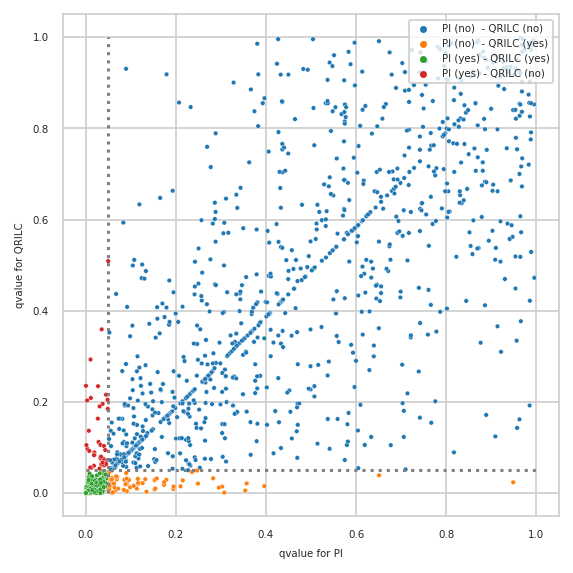

In [20]:
figsize = (4, 4)
size = 5
fig, ax = plt.subplots(figsize=figsize)
x_col = to_plot.columns[0]
y_col = to_plot.columns[1]
ax = sns.scatterplot(data=to_plot,
                     x=x_col,
                     y=y_col,
                     s=size,
                     hue='Differential Analysis Comparison',
                     ax=ax)
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.4,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_1_{args.model_key}'] = (
    args.out_folder /
    f'diff_analysis_comparision_1_{args.model_key}')
fname = files_out[f'diff_analysis_comparision_1_{args.model_key}']
vaep.savefig(fig, name=fname)

- also showing how many features were measured ("observed") by size of circle

vaep.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC/diff_analysis_comparision_2_QRILC


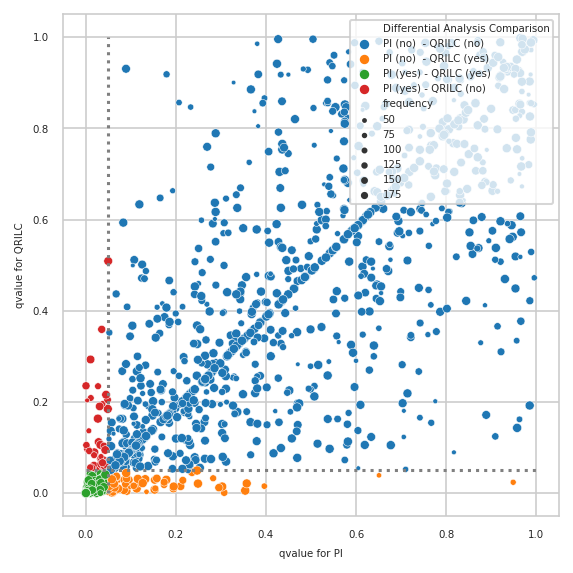

In [21]:
fig, ax = plt.subplots(figsize=figsize)
ax = sns.scatterplot(data=to_plot,
                     x=to_plot.columns[0],
                     y=to_plot.columns[1],
                     size='frequency',
                     s=size,
                     sizes=(5, 20),
                     hue='Differential Analysis Comparison')
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.6,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_2_{args.model_key}'] = (
    args.out_folder / f'diff_analysis_comparision_2_{args.model_key}')
vaep.savefig(
    fig, name=files_out[f'diff_analysis_comparision_2_{args.model_key}'])

## Only features contained in model
- this block exist due to a specific part in the ALD analysis of the paper

In [22]:
scores_model_only = scores.reset_index(level=-1, drop=True)
_diff = scores_model_only.index.difference(scores_common.index)
if not _diff.empty:
    scores_model_only = (scores_model_only
                         .loc[
                             _diff,
                             args.model_key]
                         .sort_values(by='qvalue', ascending=True)
                         .join(freq_feat.squeeze().rename(freq_feat.columns.droplevel()[0])
                               )
                         )
    display(scores_model_only)
else:
    scores_model_only = None
    logger.info("No features only in new comparision model.")

if not _diff.empty:
    scores_model_only.to_excel(writer, 'only_model', **writer_args)
    display(scores_model_only.rejected.value_counts())
    scores_model_only_rejected = scores_model_only.loc[scores_model_only.rejected]
    scores_model_only_rejected.to_excel(
        writer, 'only_model_rejected', **writer_args)

root - INFO     No features only in new comparision model.


## DISEASES DB lookup

Query diseases database for gene associations with specified disease ontology id.

In [23]:
data = vaep.databases.diseases.get_disease_association(
    doid=args.disease_ontology, limit=10000)
data = pd.DataFrame.from_dict(data, orient='index').rename_axis('ENSP', axis=0)
data = data.rename(columns={'name': args.annotaitons_gene_col}).reset_index(
).set_index(args.annotaitons_gene_col)
data

vaep.databases.diseases - WARNING  There are more associations available


,ENSP,score
None,,
PSEN2,ENSP00000355747,5.000
PSEN1,ENSP00000326366,5.000
APOE,ENSP00000252486,5.000
APP,ENSP00000284981,5.000
MAPT,ENSP00000340820,4.800
...,...,...
ZBTB22,ENSP00000407545,0.683
HMGN2,ENSP00000355228,0.683
PPP1R13B,ENSP00000202556,0.683


## Shared features
ToDo: new script -> DISEASES DB lookup

In [24]:
feat_name = scores.index.names[0]  # first index level is feature name
if args.annotaitons_gene_col in scores.index.names:
    logger.info(f"Found gene annotation in scores index:  {scores.index.names}")
else:
    logger.info(f"No gene annotation in scores index:  {scores.index.names}"
                " Exiting.")
    import sys
    sys.exit(0)

root - INFO     No gene annotation in scores index:  ['protein groups', 'Source'] Exiting.


SystemExit: 0

In [ ]:
gene_to_PG = (scores.droplevel(
    list(set(scores.index.names) - {feat_name, args.annotaitons_gene_col})
)
    .index
    .to_frame()
    .reset_index(drop=True)
    .set_index(args.annotaitons_gene_col)
)
gene_to_PG.head()

In [ ]:
disease_associations_all = data.join(
    gene_to_PG).dropna().reset_index().set_index(feat_name).join(annotations)
disease_associations_all

## only by model

In [ ]:
idx = disease_associations_all.index.intersection(scores_model_only.index)
disease_assocications_new = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new.head(20)

In [ ]:
mask = disease_assocications_new.loc[idx, 'score'] >= 2.0
disease_assocications_new.loc[idx].loc[mask]

## Only by model which were significant

In [ ]:
idx = disease_associations_all.index.intersection(
    scores_model_only_rejected.index)
disease_assocications_new_rejected = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new_rejected.head(20)

In [ ]:
mask = disease_assocications_new_rejected.loc[idx, 'score'] >= 2.0
disease_assocications_new_rejected.loc[idx].loc[mask]

## Shared which are only significant for by model

In [ ]:
mask = (scores_common[(str(args.model_key), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_model = (disease_associations_all.loc[idx].sort_values(
    'score', ascending=False))
disease_assocications_shared_rejected_by_model.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_model.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_model.loc[idx].loc[mask]

## Only significant by RSN

In [ ]:
mask = (scores_common[(str(args.baseline), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_RSN = (
    disease_associations_all
    .loc[idx]
    .sort_values('score', ascending=False))
disease_assocications_shared_rejected_by_RSN.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_RSN.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_RSN.loc[idx].loc[mask]

## Write to excel

In [ ]:
disease_associations_all.to_excel(
    writer, sheet_name='disease_assoc_all', **writer_args)
disease_assocications_new.to_excel(
    writer, sheet_name='disease_assoc_new', **writer_args)
disease_assocications_new_rejected.to_excel(
    writer, sheet_name='disease_assoc_new_rejected', **writer_args)

## Outputs

In [ ]:
writer.close()
files_out